In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [55]:
def fraction(l):
    print("L", l)
    log = np.log
    exp = np.exp
    
    v = l*log(l)
    print("V: ", v)
    d = l*v
    print("d: ", d)
    
    temp = (v - 32)*(v - 32)
    print('Exponent numerator: {}'.format(temp))
    print('Exponent Denominator: {}'.format(32*d))    
    exponent = -1*(temp/(32*d))
    print("Exponent: ", exponent)
    print(l*exp(exponent))
    print()
    return l*exp(exponent)


In [69]:
fraction(3.3)

L 3.3
V:  3.939944145959034
d:  13.00181568166481
Exponent numerator: 787.3667345318988
Exponent Denominator: 416.05810181327394
Exponent:  -1.8924441829167107
0.4973199415415911



0.4973199415415911

In [60]:
s = pd.Series({i: fraction(i) for i in range(2, 100)})
# s

L 2
V:  1.3862943611198906
d:  2.772588722239781
Exponent numerator: 937.1989729439998
Exponent Denominator: 88.722839111673
Exponent:  -10.563221176504205
5.169890296378042e-05

L 3
V:  3.295836866004329
d:  9.887510598012987
Exponent numerator: 823.9289812230362
Exponent Denominator: 316.4003391364156
Exponent:  -2.604071106471856
0.22191545171007565

L 4
V:  5.545177444479562
d:  22.18070977791825
Exponent numerator: 699.8576364440729
Exponent Denominator: 709.782712893384
Exponent:  -0.9860167396739601
1.492238917666425

L 5
V:  8.047189562170502
d:  40.23594781085251
Exponent numerator: 573.7371278705938
Exponent Denominator: 1287.5503299472803
Exponent:  -0.4456036509998688
3.202187792751461

L 6
V:  10.75055681536833
d:  64.50334089220999
Exponent numerator: 451.5388356568893
Exponent Denominator: 2064.1069085507197
Exponent:  -0.21875748479226312
4.8210993570721525

L 7
V:  13.621371043387192
d:  95.34959730371034
Exponent numerator: 337.7740023248468
Exponent Denominator: 3051

In [61]:
s = pd.Series([old_fraction(i) for i in range(2, 100)])
s

0      0.261802
1     -0.470110
2     -1.058183
3     -1.475184
4     -1.810951
5     -2.106456
6     -2.379751
7     -2.639496
8     -2.890233
9     -3.134544
10    -3.373994
11    -3.609594
12    -3.842026
13    -4.071775
14    -4.299196
15    -4.524558
16    -4.748071
17    -4.969904
18    -5.190195
19    -5.409059
20    -5.626593
21    -5.842881
22    -6.057996
23    -6.272001
24    -6.484954
25    -6.696905
26    -6.907900
27    -7.117981
28    -7.327185
29    -7.535546
        ...    
68   -15.210074
69   -15.398424
70   -15.586453
71   -15.774165
72   -15.961565
73   -16.148657
74   -16.335447
75   -16.521939
76   -16.708136
77   -16.894044
78   -17.079665
79   -17.265004
80   -17.450065
81   -17.634852
82   -17.819367
83   -18.003616
84   -18.187600
85   -18.371324
86   -18.554791
87   -18.738003
88   -18.920965
89   -19.103679
90   -19.286149
91   -19.468376
92   -19.650364
93   -19.832116
94   -20.013635
95   -20.194923
96   -20.375982
97   -20.556816
Length: 98, dtype: float

2    0.544795
3    0.579202
4    0.611244
5    0.640270
6    0.666452
7    0.690131
8    0.711649
9    0.731305
dtype: float64

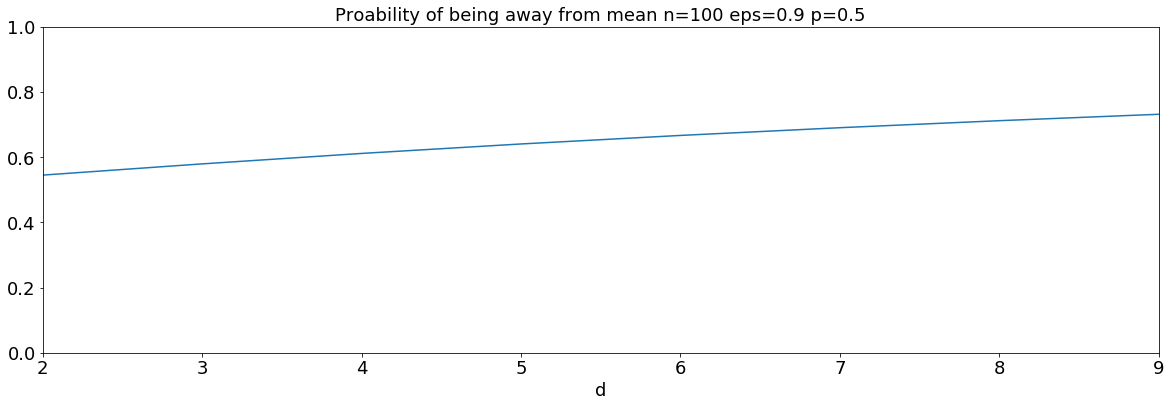

In [115]:
def upper_bound(d=2, n=100, epsilon=0.05, p=0.99):
    alpha = np.sqrt(n)/(np.sqrt(d)*epsilon)
    epsilon = 0.05
    n = 10
    
    return p + np.exp(-0.5*(alpha*n*0.25))


p = 0.5
s = pd.Series({d: upper_bound(d=d, n=10, epsilon=0.9, p=p)
               for d in range(2, 10)})

ax = s.plot(figsize=(20,6), fontsize=18)
ax.set_title('Proability of being away from mean n={} eps={} p={}'.format(100, 0.9, p), fontsize=18)
ax.set_xlabel('d', fontsize=18)
ax.set_ylim(0,1)


s

(0, 1)

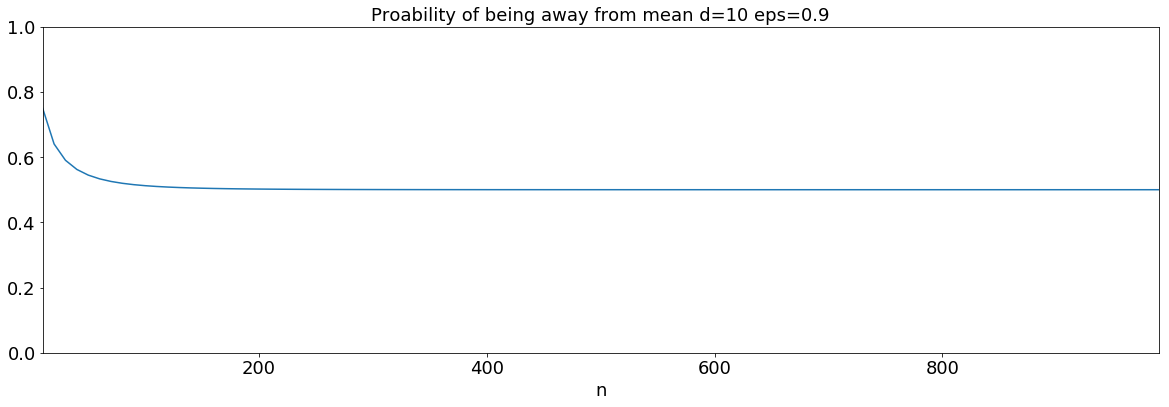

In [112]:
p = 0.5
s = pd.Series({n: upper_bound(d=10, n=n, epsilon=0.9, p=p)
               for n in range(10, 1000, 10)})

ax = s.plot(figsize=(20,6), fontsize=18)
ax.set_title('Proability of being away from mean d={} eps={}'.format(10, 0.9), fontsize=18)
ax.set_xlabel('n', fontsize=18)
ax.set_ylim(0,1)


(0, 1)

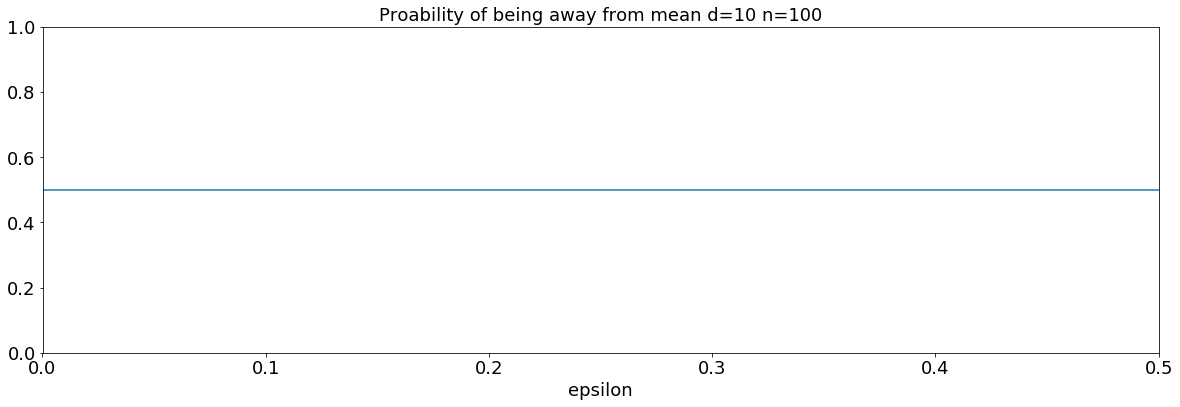

In [110]:
p = 0.5
s = pd.Series({eps: upper_bound(d=2, n=100, epsilon=eps, p=p)
               for eps in np.linspace(0.0001, 0.5, 10)})

ax = s.plot(figsize=(20,6), fontsize=18)
ax.set_title('Proability of being away from mean d={} n={}'.format(10, 100), fontsize=18)
ax.set_xlabel('epsilon', fontsize=18)
ax.set_ylim(0,1)

In [116]:
np.exp(1)

2.718281828459045

In [117]:
pd.Series({p: p/np.exp(1) for p in np.linspace(0.001, 1, 10)})

0.001    0.000368
0.112    0.041202
0.223    0.082037
0.334    0.122872
0.445    0.163706
0.556    0.204541
0.667    0.245376
0.778    0.286210
0.889    0.327045
1.000    0.367879
dtype: float64